# Business Understanding

"Notebook clearly explains the value for a specific stakeholder, including:
- Introduction explains the real-world problem the project aims to solve
- Introduction identifies stakeholders who could use the project and how they would use it
- Conclusion summarizes implications of the project for the real-world problem and stakeholders "

# Data Understanding

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"

# Data Preperation

"Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/AviationData.csv',
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)  
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.shape

(88889, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [5]:
df = pd.read_csv('data/AviationData.csv', index_col = 0,
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022


In [6]:
df.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [7]:
df.columns = df.columns.str.strip()

In [8]:
whitespace_check = any(df.columns == df.columns.str.strip())


if whitespace_check:
    print("No Whitespaces")
else:
    print("Some whitespaces")

No Whitespaces


In [9]:
(df['Aircraft.Category'] == 'Airplane').value_counts()

False    61272
True     27617
Name: Aircraft.Category, dtype: int64

In [10]:
df= df[df['Aircraft.Category'] == 'Airplane']
df['Aircraft.Category']

Event.Id
20170710X52551    Airplane
20020909X01562    Airplane
20020909X01561    Airplane
20020917X02148    Airplane
20020917X02134    Airplane
                    ...   
20221213106455    Airplane
20221215106463    Airplane
20221219106475    Airplane
20221219106470    Airplane
20221227106497    Airplane
Name: Aircraft.Category, Length: 27617, dtype: object

In [11]:
df = df[df['Amateur.Built'] =='No']

df['Amateur.Built']

Event.Id
20170710X52551    No
20020909X01562    No
20020909X01561    No
20020917X02148    No
20020917X02134    No
                  ..
20221213106455    No
20221215106463    No
20221219106475    No
20221219106470    No
20221227106497    No
Name: Amateur.Built, Length: 24417, dtype: object

In [12]:
type(df['Total.Fatal.Injuries'][0])

float

In [13]:
df['Total.Fatal.Injuries']

Event.Id
20170710X52551    NaN
20020909X01562      0
20020909X01561      0
20020917X02148      0
20020917X02134      1
                 ... 
20221213106455      0
20221215106463      0
20221219106475      0
20221219106470      0
20221227106497      0
Name: Total.Fatal.Injuries, Length: 24417, dtype: object

In [14]:
# imputing Fatality values from Injury Severity Column
for index, row in df.iterrows():
    if row['Injury.Severity'] == 'Non-Fatal' and pd.isnull(row['Total.Fatal.Injuries']):
        df.at[index, 'Total.Fatal.Injuries'] = 0

In [15]:
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,NaN,Air Canada,0,NaN,1,44,VMC,Climb,Probable Cause,19-09-2017
20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,...,Personal,NaN,0,0,0,2,VMC,Takeoff,Probable Cause,01-01-1982
20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,...,Business,NaN,0,0,0,2,IMC,Landing,Probable Cause,01-01-1982
20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,0,1,0,IMC,Cruise,Probable Cause,02-01-1983
20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),...,Personal,NaN,1,0,0,0,IMC,Takeoff,Probable Cause,02-01-1983


In [16]:
nan_values = df.isna()

nan_counts = nan_values.sum()

print(nan_counts)


Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      6
Country                       7
Latitude                   5246
Longitude                  5252
Airport.Code               8843
Airport.Name               8405
Injury.Severity             813
Aircraft.damage            1270
Aircraft.Category             0
Registration.Number         203
Make                          3
Model                        18
Amateur.Built                 0
Number.of.Engines          2551
Engine.Type                3956
FAR.Description             480
Schedule                  21481
Purpose.of.flight          3683
Air.carrier               14061
Total.Fatal.Injuries        126
Total.Serious.Injuries     2846
Total.Minor.Injuries       2562
Total.Uninjured             718
Weather.Condition          2979
Broad.phase.of.flight     18621
Report.Status              4662
Publication.Date            957
dtype: int64


In [17]:
# Create a boolean mask for rows with NaN values in 'Total.Fatal.Injuries'
mask_nan_values = df['Total.Fatal.Injuries'].isna()

# Use the boolean mask to select the rows with NaN values
rows_with_nan = df[mask_nan_values]

# Display the rows with NaN values
rows_with_nan


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",United States,NaN,NaN,HRL,HARLINGEN IND.AIR PARK,Incident,...,NaN,Mexicana Airlines,NaN,NaN,NaN,83,IMC,Landing,Probable Cause,04-12-2014
20020917X03106,Incident,DCA82IA021,1982-05-12,"FT. MYER, FL",United States,NaN,NaN,NaN,NaN,Incident,...,Business,NaN,NaN,NaN,NaN,3,VMC,Climb,Probable Cause,01-02-2016
20020917X04065,Incident,NYC82IA137,1982-07-05,"FLUSHING, NY",United States,NaN,NaN,LGA,LAGUARDIA,Incident,...,NaN,Air Canada,NaN,NaN,NaN,74,VMC,Climb,Probable Cause,04-12-2014
20020917X04216,Incident,ANC82IA095,1982-09-21,"NEAR DILLINGHAM, AK",United States,NaN,NaN,NaN,NaN,Incident,...,Unknown,Yute Air Alaska Inc.,NaN,NaN,NaN,5,VMC,Climb,Probable Cause,08-11-2012
20001214X42478,Incident,LAX83IA149B,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,Incident,...,Unknown,NaN,NaN,NaN,NaN,588,VMC,Standing,Probable Cause,04-12-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090303X93946,Incident,CEN09RA185,2007-11-05,"Mandarfrn, Austria",Austria,46.958056,10.841944,NaN,NaN,Incident,...,External Load,NaN,NaN,NaN,1,1,VMC,NaN,Foreign,01-04-2009
20121004X53806,Incident,ERA13IA006,2007-11-09,NaN,Unknown,46.573056,-37.768334,NaN,NaN,Incident,...,Public Aircraft - Federal,NaN,NaN,NaN,NaN,6,IMC,Maneuvering,Probable Cause,30-05-2013
20071231X02010,Incident,ENG08IA002,2007-11-17,"Greenville, TX",United States,33.191111,-95.978334,DAL,Love Field,Incident,...,NaN,Southwest Airlines,NaN,NaN,NaN,138,VMC,Climb,Probable Cause,22-06-2009


In [18]:
df['Total.Fatal.Injuries']

Event.Id
20170710X52551    0
20020909X01562    0
20020909X01561    0
20020917X02148    0
20020917X02134    1
                 ..
20221213106455    0
20221215106463    0
20221219106475    0
20221219106470    0
20221227106497    0
Name: Total.Fatal.Injuries, Length: 24417, dtype: object

In [19]:
# null value check
# df.isna().sum()

In [20]:
df['Event.Date'] = pd.to_datetime(df.loc[:, 'Event.Date'])
mask = df['Event.Date'].dt.year >=1985
df_current = df.loc[mask]
df_current

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X35509,Accident,DEN85LA064,1985-01-14,"WAPITI, WY",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,1,1,NaN,VMC,Maneuvering,Probable Cause,12-01-2016
20001214X36510,Accident,LAX85LA257,1985-05-13,"MESA, AZ",United States,NaN,NaN,FFZ,FALCON FLD.,Non-Fatal,...,Positioning,NaN,0,1,NaN,NaN,VMC,Approach,Probable Cause,03-08-2011
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37274,Accident,NYC85LA188,1985-07-21,"SIDNEY, ME",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,NaN,NaN,4,VMC,Takeoff,Probable Cause,01-02-2016
20001214X37356,Incident,ATL85IA251,1985-08-16,"HILTON HEAD, SC",United States,NaN,NaN,49J,HILTON HEAD,Incident,...,Business,NaN,NaN,NaN,NaN,4,VMC,Landing,Probable Cause,26-07-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,Non-Fatal,...,NaN,NaN,0,0,0,1,NaN,NaN,NaN,14-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0,0,0,1,VMC,NaN,NaN,27-12-2022
20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,...,NaN,NaN,0,0,0,1,NaN,NaN,NaN,19-12-2022


In [21]:
df_1985 = df_current.copy()
df_1985['Event.Date'] = pd.to_datetime(df_1985.loc[:, 'Event.Date'])
num_rows_before_1985 = (df_1985['Event.Date'].dt.year < 1985).sum()
print("Number of rows with a date before 1985:", num_rows_before_1985)


Number of rows with a date before 1985: 0


In [22]:
df_1985['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', nan, 'Minor', 'Unknown'], dtype=object)

In [23]:
df_1985['Total.Uninjured'] = pd.to_numeric(df_1985['Total.Uninjured'], errors='coerce')
condition = df_1985['Total.Uninjured'] >= 5
df_1985.loc[condition, 'Aircraft.damage'] = 'Minor'

In [24]:

df_1985 = df_1985.dropna(subset=['Total.Fatal.Injuries'], axis=0)

df_1985['Total.Fatal.Injuries'] = df_1985['Total.Fatal.Injuries'].astype(int)

In [25]:
df_1985['Total.Fatal.Injuries'].mean()

0.6491812508797448

In [26]:
df_1985['Total.Fatal.Injuries'] = pd.to_numeric(df_1985['Total.Fatal.Injuries'], errors='coerce')
median_TF = df_1985['Total.Fatal.Injuries'].median()
df_1985['Total.Fatal.Injuries'].fillna(median_TF, inplace=True)
df_1985['Total.Fatal.Injuries']

Event.Id
20001214X35509     0
20001214X36510     0
20001214X36887     1
20001214X37274     0
20001214X37718    17
                  ..
20221213106455     0
20221215106463     0
20221219106475     0
20221219106470     0
20221227106497     0
Name: Total.Fatal.Injuries, Length: 21313, dtype: int32

In [27]:
df_1985 = df_1985.dropna(subset=['Make', 'Model'])

In [28]:
df_1985['Model'].nunique()

3514

In [29]:
df_1985.loc[df_1985['Model'] == '108 3', 'Model'] = '108-3'
df_1985.loc[df_1985['Model'] == '100 180', 'Model'] = '100-180'
df_1985.loc[df_1985['Model'] == '108 1', 'Model'] = '108-1'
df_1985.loc[df_1985['Model'] == '114 B', 'Model'] = '114-B'
df_1985.loc[df_1985['Model'] == '114B', 'Model'] = '114-B'
df_1985.loc[df_1985['Model'] == '14 19', 'Model'] = '14-19'
df_1985.loc[df_1985['Model'] == '150 - F', 'Model'] = '150-F'
df_1985.loc[df_1985['Model'] == '150 - G', 'Model'] = '150-G'
df_1985.loc[df_1985['Model'] == '164B', 'Model'] = '164-B'
df_1985.loc[df_1985['Model'] == '17 30', 'Model'] = '17-30'
df_1985.loc[df_1985['Model'] == '17 30A', 'Model'] = '17-30A'
df_1985.loc[df_1985['Model'] == '17 31A', 'Model'] = '17-31A'
df_1985.loc[df_1985['Model'] == '17 30', 'Model'] = '17-30'
df_1985.loc[df_1985['Model'] == '170 B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '170 - B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '170B', 'Model'] = '170-B'
df_1985.loc[df_1985['Model'] == '172 M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172 - M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172M', 'Model'] = '172-M'
df_1985.loc[df_1985['Model'] == '172P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172 P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172 N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172A', 'Model'] = '172-A'
df_1985.loc[df_1985['Model'] == '172 A', 'Model'] = '172-A'
df_1985.loc[df_1985['Model'] == '172S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172 S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172F', 'Model'] = '172-F'
df_1985.loc[df_1985['Model'] == '172 - F', 'Model'] = '172-F'
df_1985.loc[df_1985['Model'] == '172 - H', 'Model'] = '172-H'
df_1985.loc[df_1985['Model'] == '172H', 'Model'] = '172-H'
df_1985.loc[df_1985['Model'] == '172 - S', 'Model'] = '172-S'
df_1985.loc[df_1985['Model'] == '172 - P', 'Model'] = '172-P'
df_1985.loc[df_1985['Model'] == '172 - N', 'Model'] = '172-N'
df_1985.loc[df_1985['Model'] == '172 K', 'Model'] = '172-K'
df_1985.loc[df_1985['Model'] == '172K', 'Model'] = '172-K'
df_1985.loc[df_1985['Model'] == '172 - R', 'Model'] = '172-R'
df_1985.loc[df_1985['Model'] == '172R', 'Model'] = '172-R'
df_1985.loc[df_1985['Model'] == '172RG', 'Model'] = '172-RG'
df_1985.loc[df_1985['Model'] == '172 RG', 'Model'] = '172-RG'
df_1985.loc[df_1985['Model'] == '172SP', 'Model'] = '172-SP'
df_1985.loc[df_1985['Model'] == '172 SP', 'Model'] = '172-SP'
df_1985.loc[df_1985['Model'] == '1730A', 'Model'] = '1730-A'
df_1985.loc[df_1985['Model'] == '1730 - A', 'Model'] = '1730-A'
df_1985.loc[df_1985['Model'] == '172B', 'Model'] = '172-B'
df_1985.loc[df_1985['Model'] == '172C', 'Model'] = '172-C'
df_1985.loc[df_1985['Model'] == '172D', 'Model'] = '172-D'
df_1985.loc[df_1985['Model'] == '172E', 'Model'] = '172-E'
df_1985.loc[df_1985['Model'] == '172G', 'Model'] = '172-G'
df_1985.loc[df_1985['Model'] == '172I', 'Model'] = '172-I'
df_1985.loc[df_1985['Model'] == '172L', 'Model'] = '172-L'
df_1985.loc[df_1985['Model'] == '172Q', 'Model'] = '172-Q'
df_1985.loc[df_1985['Model'] == '172XP', 'Model'] = '172-XP'
df_1985.loc[df_1985['Model'] == '175A', 'Model'] = '175-A'
df_1985.loc[df_1985['Model'] == '175B', 'Model'] = '175-B'
df_1985.loc[df_1985['Model'] == '175C', 'Model'] = '175-C'
df_1985.loc[df_1985['Model'] == '177 RG', 'Model'] = '177-RG'
df_1985.loc[df_1985['Model'] == '177RG', 'Model'] = '177-RG'
df_1985.loc[df_1985['Model'] == '177A', 'Model'] = '177-A'
df_1985.loc[df_1985['Model'] == '177B', 'Model'] = '177-B'
df_1985.loc[df_1985['Model'] == '180 - B', 'Model'] = '180-B'
df_1985.loc[df_1985['Model'] == '180 H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180A', 'Model'] = '180-A'
df_1985.loc[df_1985['Model'] == '180 H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180A', 'Model'] = '180-A'
df_1985.loc[df_1985['Model'] == '180B', 'Model'] = '180-B'
df_1985.loc[df_1985['Model'] == '180C', 'Model'] = '180-C'
df_1985.loc[df_1985['Model'] == '180D', 'Model'] = '180-D'
df_1985.loc[df_1985['Model'] == '180E', 'Model'] = '180-E'
df_1985.loc[df_1985['Model'] == '180F', 'Model'] = '180-F'
df_1985.loc[df_1985['Model'] == '180G', 'Model'] = '180-G'
df_1985.loc[df_1985['Model'] == '180J', 'Model'] = '180-J'
df_1985.loc[df_1985['Model'] == '180H', 'Model'] = '180-H'
df_1985.loc[df_1985['Model'] == '180J', 'Model'] = '180-J'
df_1985.loc[df_1985['Model'] == '180K', 'Model'] = '180-K'
df_1985.loc[df_1985['Model'] == '180M', 'Model'] = '180-M'
df_1985.loc[df_1985['Model'] == '185E', 'Model'] = '185-E'
df_1985.loc[df_1985['Model'] == '185 - E', 'Model'] = '180-E'
df_1985.loc[df_1985['Model'] == '206 - H', 'Model'] = '206-H'
df_1985.loc[df_1985['Model'] == '206H', 'Model'] = '206-H'
df_1985.loc[df_1985['Model'] == '210 5', 'Model'] = '210-5'
df_1985.loc[df_1985['Model'] == '210 5(205)', 'Model'] = '210-5(205)'
df_1985.loc[df_1985['Model'] == '210N', 'Model'] = '210-N'
df_1985.loc[df_1985['Model'] == '210 - N', 'Model'] = '210-N'
df_1985.loc[df_1985['Model'] == '210D', 'Model'] = '210-D'
df_1985.loc[df_1985['Model'] == '210 D', 'Model'] = '210-D'
df_1985.loc[df_1985['Model'] == '210A', 'Model'] = '210-A'
df_1985.loc[df_1985['Model'] == '210B', 'Model'] = '210-B'
df_1985.loc[df_1985['Model'] == '210C', 'Model'] = '210-C'
df_1985.loc[df_1985['Model'] == '210E', 'Model'] = '210-E'
df_1985.loc[df_1985['Model'] == '210F', 'Model'] = '210-F'
df_1985.loc[df_1985['Model'] == '210G', 'Model'] = '210-G'
df_1985.loc[df_1985['Model'] == '210H', 'Model'] = '210-H'
df_1985.loc[df_1985['Model'] == '210J', 'Model'] = '210-J'
df_1985.loc[df_1985['Model'] == '210K', 'Model'] = '210-K'
df_1985.loc[df_1985['Model'] == '210L', 'Model'] = '210-L'
df_1985.loc[df_1985['Model'] == '210M', 'Model'] = '210-M'
df_1985.loc[df_1985['Model'] == '2T 1A', 'Model'] = '2T-1A'
df_1985.loc[df_1985['Model'] == '2T1A', 'Model'] = '2T-1A'
df_1985.loc[df_1985['Model'] == '2T 1A 2', 'Model'] = '2T-1A-2'
df_1985.loc[df_1985['Model'] == '305 A', 'Model'] = '305-A'
df_1985.loc[df_1985['Model'] == '305A', 'Model'] = '305-A'
df_1985.loc[df_1985['Model'] == '305C', 'Model'] = '305-C'
df_1985.loc[df_1985['Model'] == '35 33', 'Model'] = '35-33'
df_1985.loc[df_1985['Model'] == '35 A33', 'Model'] = '35-A33'
df_1985.loc[df_1985['Model'] == '35A33', 'Model'] = '35-A33'
df_1985.loc[df_1985['Model'] == '35 B33', 'Model'] = '35-B33'
df_1985.loc[df_1985['Model'] == '35B33', 'Model'] = '35-B33'
df_1985.loc[df_1985['Model'] == '35C33', 'Model'] = '35-C33'
df_1985.loc[df_1985['Model'] == '35 C33', 'Model'] = '35-C33'
df_1985.loc[df_1985['Model'] == '35 - A', 'Model'] = '35-A'
df_1985.loc[df_1985['Model'] == '35A', 'Model'] = '35-A'
df_1985.loc[df_1985['Model'] == '415 C', 'Model'] = '415-C'
df_1985.loc[df_1985['Model'] == '415C', 'Model'] = '415-C'
df_1985.loc[df_1985['Model'] == '415 CD', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415 C/D', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415-C/D', 'Model'] = '415-CD'
df_1985.loc[df_1985['Model'] == '415 D', 'Model'] = '415-D'
df_1985.loc[df_1985['Model'] == '415D', 'Model'] = '415-D'
df_1985.loc[df_1985['Model'] == '415G', 'Model'] = '415-G'
df_1985.loc[df_1985['Model'] == '421 - C', 'Model'] = '421-C'
df_1985.loc[df_1985['Model'] == '421C', 'Model'] = '421-C'
df_1985.loc[df_1985['Model'] == '500 - B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500 B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500B', 'Model'] = '500-B'
df_1985.loc[df_1985['Model'] == '500 S', 'Model'] = '500-S'
df_1985.loc[df_1985['Model'] == '560 - XL', 'Model'] = '560-XL'
df_1985.loc[df_1985['Model'] == '560XL', 'Model'] = '560-XL'
model_counts = df_1985['Model'].value_counts().sort_index()
model_counts[:50]

0-1A                    1
0-58A                   1
0-58B                   2
01                      1
1                       1
1.131E                  1
10                      1
100                    17
100-180                 4
1000                    1
108                    56
108 - 3                 1
108-1                  22
108-2                  12
108-3                  20
10A                     3
110                     2
110 Special             1
110P1                   2
110SP                   1
112                    10
1124                    4
1124A                   2
1125                    2
1125 WESTWIND ASTRA     1
112A                    7
112TC                   5
112TCA                  2
114                    16
114-B                   3
114A                    1
114TC                   1
11A                     1
11AC                   28
11BC                    1
11CC                    3
11E                     1
12-m                    1
120         

In [30]:
df_1985['Model'].nunique()

3449

In [31]:
df_1985['Make'].nunique()

1329

In [32]:
df_1985['Model'].nunique()

3449

In [33]:
df_1985['Make'].fillna('', inplace=True)
df_1985.loc[df_1985['Make'].str.contains('Cessna', case=False), 'Make'] = 'CESSNA'
df_1985.loc[df_1985['Make'].str.contains('Piper', case=False), 'Make'] = 'PIPER'
df_1985.loc[df_1985['Make'].str.contains('Beechcraft|Beech', case=False), 'Make'] = 'BEECH'
df_1985.loc[df_1985['Make'].str.contains('Boeing|Boeing Stearman', case=False), 'Make'] = 'BOEING'
df_1985.loc[df_1985['Make'].str.contains('Air tractor', case=False), 'Make'] = 'AIR TRACTOR'
df_1985.loc[df_1985['Make'].str.contains('Mooney', case=False), 'Make'] = 'MOONEY'
df_1985.loc[df_1985['Make'].str.contains('CIRRUS', case=False), 'Make'] = 'CIRRUS'
df_1985.loc[df_1985['Make'].str.contains('American', case=False), 'Make'] = 'AMERICAN'
df_1985.loc[df_1985['Make'].str.contains('Airbus', case=False), 'Make'] = 'AIRBUS'
df_1985.loc[df_1985['Make'].str.contains('Grumman', case=False), 'Make'] = 'GRUMMAN'
df_1985.loc[df_1985['Make'].str.contains('Bellanca', case=False), 'Make'] = 'BELLANCA'
df_1985.loc[df_1985['Make'].str.contains('Maule', case=False), 'Make'] = 'MAULE'
df_1985.loc[df_1985['Make'].str.contains('Aeronca', case=False), 'Make'] = 'AERONCA'
df_1985.loc[df_1985['Make'].str.contains('Embraer', case=False), 'Make'] = 'EMBAER'
df_1985.loc[df_1985['Make'].str.contains('Champion', case=False), 'Make'] = 'CHAMPION'
df_1985.loc[df_1985['Make'].str.contains('Luscombe', case=False), 'Make'] = 'LUSCOMBE'
df_1985.loc[df_1985['Make'].str.contains('Stinson', case=False), 'Make'] = 'STINSON'
df_1985.loc[df_1985['Make'].str.contains('TaylorCraft', case=False), 'Make'] = 'TAYLORCRAFT'
df_1985.loc[df_1985['Make'].str.contains('Dehavilland', case=False), 'Make'] = 'DEHAVILLAND'
df_1985.loc[df_1985['Make'].str.contains('Ayres', case=False), 'Make'] = 'AYRES'
df_1985.loc[df_1985['Make'].str.contains('Raytheon', case=False), 'Make'] = 'RAYTHEON'
df_1985.loc[df_1985['Make'].str.contains('Diamond Aircraft', case=False), 'Make'] = 'DIAMOND AIRCRAFT'
df_1985.loc[df_1985['Make'].str.contains('Grumman Schweizer', case=False), 'Make'] = 'GRUMMAN-SCHWEIZER'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream-Schweizer|Gulfstream Schweizer', case=False), 'Make'] = 'GULFSTREAM-SCHWEIZER'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream American', case=False), 'Make'] = 'GULFSTREAM AMERICAN'
df_1985.loc[df_1985['Make'].str.contains('Ted Aerostar', case=False), 'Make'] = 'AEROSTAR'
df_1985.loc[df_1985['Make'].str.contains('Lockheed', case=False), 'Make'] = 'LOCKHEED'
df_1985.loc[df_1985['Make'].str.contains('Gulfstream Aerospace', case=False), 'Make'] = 'GULFSTREAM'
df_1985.loc[df_1985['Make'].str.contains('Northrop', case=False), 'Make'] = 'NORTHROP'
df_1985.loc[df_1985['Make'].str.contains('Helio', case=False), 'Make'] = 'HELIO'
df_1985.loc[df_1985['Make'].str.contains('Canadair', case=False), 'Make'] = 'CANADAIR'
df_1985.loc[df_1985['Make'].str.contains('Learjet', case=False), 'Make'] = 'LEARJET'
df_1985.loc[df_1985['Make'].str.contains('Volmer', case=False), 'Make'] = 'VOLMER'
df_1985.loc[df_1985['Make'].str.contains('Ryan', case=False), 'Make'] = 'RYAN'
df_1985.loc[df_1985['Make'].str.contains('Britten', case=False), 'Make'] = 'BRITTEN-NORMAN'
df_1985.loc[df_1985['Make'].str.contains('Howard', case=False), 'Make'] = 'HOWARD'
df_1985.loc[df_1985['Make'].str.contains('British Airways', case=False), 'Make'] = 'BRITISH AIRWAYS'
df_1985.loc[df_1985['Make'].str.contains('British Aerospace', case=False), 'Make'] = 'BRITISH AEROSPACE'
df_1985.loc[df_1985['Make'].str.contains('Textron', case=False), 'Make'] = 'TEXTRON'

In [34]:
model_frequency = df_1985['Model'].value_counts()
model_frequency[:35]

172          772
737          402
152          317
182          304
172-S        283
PA28         273
SR22         265
172-N        253
180          213
A36          189
172-M        184
PA-18-150    180
150          179
PA-28-140    168
172-P        146
140          117
172-R        113
170-B        110
PA-28-161    106
PA-28-180    105
7AC           97
210           96
7GCBC         95
PA-28-181     95
M20J          94
A185F         90
PA18          87
SR20          86
208B          84
PA-18         81
58            81
A320          80
182P          80
177           76
777           75
Name: Model, dtype: int64

In [35]:
make_frequency = df_1985['Make'].value_counts()
make_frequency[:35]

CESSNA                    7190
PIPER                     4050
BEECH                     1496
BOEING                    1241
AIR TRACTOR                432
MOONEY                     410
CIRRUS                     400
AMERICAN                   359
AIRBUS                     274
GRUMMAN                    231
BELLANCA                   219
MAULE                      216
AERONCA                    201
EMBAER                     170
CHAMPION                   158
LUSCOMBE                   142
STINSON                    136
TAYLORCRAFT                104
DIAMOND AIRCRAFT           100
AYRES                       96
DEHAVILLAND                 96
RAYTHEON                    86
AVIAT AIRCRAFT INC          72
LEARJET                     68
AERO COMMANDER              68
BOMBARDIER INC              65
MCDONNELL DOUGLAS           64
SOCATA                      63
ROCKWELL INTERNATIONAL      52
FLIGHT DESIGN GMBH          42
BOMBARDIER                  42
Aviat                       41
De Havil

In [36]:
df_1985['Make'].nunique()

1097

In [37]:
df.shape

(24417, 30)

# Data Analysis

"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the new movie studio succeed
"

C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


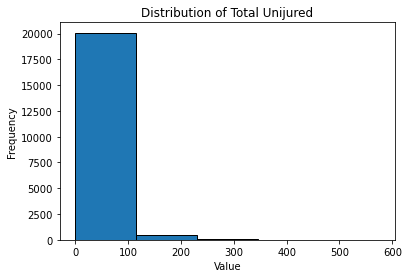

In [38]:
plt.hist(df_1985['Total.Uninjured'], bins=5, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Unijured')

plt.show()

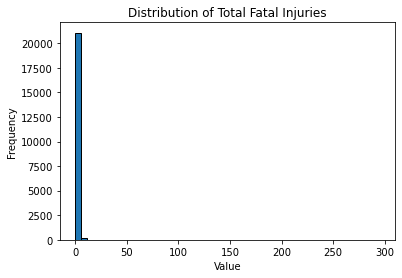

In [39]:
plt.hist(df_1985['Total.Fatal.Injuries'], bins=50, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Fatal Injuries')

plt.show()

In [40]:
df_1985['Event.Date'] = pd.to_datetime(df_1985.loc[:, 'Event.Date'])
num_rows_before_1985 = (df_1985['Event.Date'].dt.year < 1985).sum()
print("Number of rows with a date before 1985:", num_rows_before_1985)


Number of rows with a date before 1985: 0


In [41]:
for index, row in df.iterrows():
    if row['Injury.Severity'] == 'Non-Fatal':
        if index in df_1985.index:
            df_1985.at[index, 'Total.Fatal.Injuries'] = 0
df_1985

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X35509,Accident,DEN85LA064,1985-01-14,"WAPITI, WY",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,1,1,NaN,VMC,Maneuvering,Probable Cause,12-01-2016
20001214X36510,Accident,LAX85LA257,1985-05-13,"MESA, AZ",United States,NaN,NaN,FFZ,FALCON FLD.,Non-Fatal,...,Positioning,NaN,0,1,NaN,NaN,VMC,Approach,Probable Cause,03-08-2011
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37274,Accident,NYC85LA188,1985-07-21,"SIDNEY, ME",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,NaN,NaN,4.0,VMC,Takeoff,Probable Cause,01-02-2016
20001214X37718,Accident,ATL85MA286,1985-09-29,"JENKINSBURG, GA",United States,NaN,NaN,NaN,WEST WIND SPORT PARACHUTE,Fatal(17),...,Skydiving,NaN,17,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,14-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0,0,0,1.0,VMC,NaN,NaN,27-12-2022
20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,19-12-2022


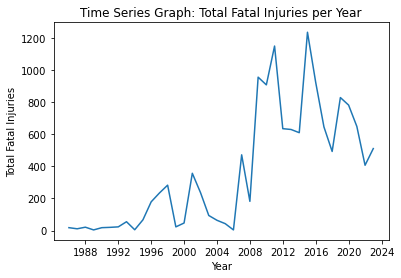

In [42]:
df_1985['Total.Fatal.Injuries'] = pd.to_numeric(df_1985['Total.Fatal.Injuries'], errors='coerce')

df_resampled = df_1985.resample('Y', on='Event.Date')['Total.Fatal.Injuries'].sum()

plt.plot(df_resampled.index, df_resampled)
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.title('Time Series Graph: Total Fatal Injuries per Year')
plt.show()

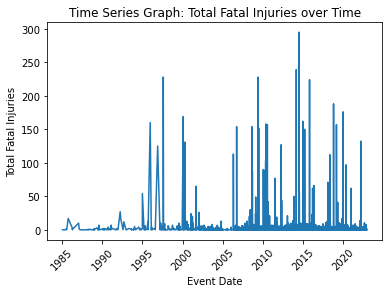

In [43]:
plt.plot(df_1985['Event.Date'], df_1985['Total.Fatal.Injuries'])
plt.xlabel('Event Date')
plt.ylabel('Total Fatal Injuries')
plt.title('Time Series Graph: Total Fatal Injuries over Time')
plt.xticks(rotation=45)
plt.show()


In [44]:
type(df_1985['Event.Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
has_Date_sample = df_1985[df_1985["Publication.Date"].notna()]
has_Date_sample

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X35509,Accident,DEN85LA064,1985-01-14,"WAPITI, WY",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,1,1,NaN,VMC,Maneuvering,Probable Cause,12-01-2016
20001214X36510,Accident,LAX85LA257,1985-05-13,"MESA, AZ",United States,NaN,NaN,FFZ,FALCON FLD.,Non-Fatal,...,Positioning,NaN,0,1,NaN,NaN,VMC,Approach,Probable Cause,03-08-2011
20001214X36887,Accident,NYC85FA145B,1985-06-11,"BELMAR, NJ",United States,NaN,NaN,BLM,BELMAR MONMOUTH CO.,Fatal(1),...,Instructional,NaN,1,1,4,NaN,VMC,Takeoff,Probable Cause,08-04-2013
20001214X37274,Accident,NYC85LA188,1985-07-21,"SIDNEY, ME",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,Personal,NaN,0,NaN,NaN,4.0,VMC,Takeoff,Probable Cause,01-02-2016
20001214X37718,Accident,ATL85MA286,1985-09-29,"JENKINSBURG, GA",United States,NaN,NaN,NaN,WEST WIND SPORT PARACHUTE,Fatal(17),...,Skydiving,NaN,17,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,14-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0,0,0,1.0,VMC,NaN,NaN,27-12-2022
20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,...,NaN,NaN,0,0,0,1.0,NaN,NaN,NaN,19-12-2022


In [46]:
dfa = pd.read_csv('data/USState_Codes.csv',
                 encoding='Latin-1',
                 low_memory=False,
                 dtype=str)  
dfa.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [47]:
df_1985['Total.Fatal.Injuries'] = pd.to_numeric(df_1985['Total.Fatal.Injuries'], errors = 'coerce')
Fatal_Injuries_df = df_1985[df_1985['Total.Fatal.Injuries']> 2]
Fatal_Injuries_df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001214X37718,Accident,ATL85MA286,1985-09-29,"JENKINSBURG, GA",United States,NaN,NaN,NaN,WEST WIND SPORT PARACHUTE,Fatal(17),...,Skydiving,NaN,17,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
20001213X33054,Accident,FTW86FA050,1986-03-29,"SEAGOVILLE, TX",United States,NaN,NaN,59F,SEAGOVILLE,Fatal(3),...,Skydiving,NaN,3,2,NaN,NaN,VMC,Takeoff,Probable Cause,17-10-2016
20001213X30060,Accident,DCA87MA018B,1987-01-15,"KEARNS, UT",United States,NaN,NaN,NaN,NaN,Fatal(10),...,Instructional,NaN,10,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,10-07-2019
20001213X30060,Accident,DCA87MA018A,1987-01-15,"KEARNS, UT",United States,NaN,NaN,NaN,NaN,Fatal(10),...,Unknown,Sky West Airlines Inc. (dba: Sky West Airlines...,10,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,10-07-2019
20001213X28167,Accident,MKC89FA099,1989-04-27,"AINSWORTH, NE",United States,NaN,NaN,ANW,NaN,Fatal(3),...,Other Work Use,NaN,3,NaN,NaN,NaN,IMC,Climb,Probable Cause,17-08-2012


In [48]:
most_frequent_model = df_1985['Model'].value_counts().idxmax()
most_frequent_model

'172'

In [49]:
least_frequent_model = df_1985['Model'].value_counts().idxmin()
least_frequent_model

'T211'

In [50]:
num_make = df_1985['Make'].nunique()
num_make

1097

In [51]:
most_frequent_make = df_1985['Make'].value_counts().idxmax()
most_frequent_make

'CESSNA'

In [52]:
least_frequent_make = df_1985['Make'].value_counts().idxmin()
least_frequent_make

'JABIRU USA SPORT AIRCRAFT'

In [53]:
make_frequency = df_1985['Make'].value_counts()
make_frequency

CESSNA                 7190
PIPER                  4050
BEECH                  1496
BOEING                 1241
AIR TRACTOR             432
                       ... 
Aviat Aircraft Inc.       1
GORDON SCOT A             1
Liberty                   1
COYOTE                    1
COMMONWEALTH              1
Name: Make, Length: 1097, dtype: int64

In [54]:
specific_model = '152'
fatalities_with_specific_model = df_1985[df_1985['Model'] == specific_model]['Total.Fatal.Injuries'].sum()

fatalities_with_specific_model

52

In [55]:
fatalities_by_model = df_1985.groupby('Model')['Total.Fatal.Injuries'].sum()
fatalities_by_model

Model
0-1A             0
0-58A            0
0-58B            0
01               2
1                0
                ..
Zlin 526F        1
Zodiac 601 XL    1
Zodiac 601XL     0
lebed            2
sportstar        0
Name: Total.Fatal.Injuries, Length: 3449, dtype: int32

In [56]:
fatalities_by_make = df_1985.groupby('Make')['Total.Fatal.Injuries'].sum()
fatalities_by_make

Make
177MF LLC        0
2021FX3 LLC      0
3XTRIM           1
737              0
777              0
                ..
Zenair           0
Zlin             0
Zlin Aviation    0
Zodiac           1
de Havilland     2
Name: Total.Fatal.Injuries, Length: 1097, dtype: int32

In [57]:
fatalities_by_make = fatalities_by_make.sort_values(ascending=False)
fatalities_by_make

Make
BOEING                            3237
CESSNA                            2622
AIRBUS                            1668
PIPER                             1622
BEECH                             1118
                                  ... 
Icon                                 0
T BIRD                               0
ISRAEL AEROSPACE INDUSTRIESLTD       0
INTERSTATE                           0
177MF LLC                            0
Name: Total.Fatal.Injuries, Length: 1097, dtype: int32

In [58]:
Engine_type = df_1985['Engine.Type'].value_counts()
Engine_type

Reciprocating      14997
Turbo Prop          1238
Turbo Fan            895
Turbo Jet            129
Unknown               76
Geared Turbofan       12
Turbo Shaft           10
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [59]:
Engine_Injuries = df_1985.groupby('Engine.Type')['Total.Fatal.Injuries'].sum()
Engine_Injuries = Engine_Injuries.sort_values(ascending=False)
Engine_Injuries

Engine.Type
Reciprocating      4273
Turbo Fan          1149
Unknown             896
Turbo Prop          845
Turbo Jet            67
Turbo Shaft           3
UNK                   0
Geared Turbofan       0
Electric              0
Name: Total.Fatal.Injuries, dtype: int32

In [60]:
Engine_numbers = df_1985['Number.of.Engines'].value_counts()
Engine_numbers

1    15719
2     2969
4       86
3       33
0        8
6        1
8        1
Name: Number.of.Engines, dtype: int64

In [61]:
FAR_description = df_1985['FAR.Description'].value_counts()
FAR_description

091                              13409
Part 91: General Aviation         2498
NUSN                              1119
NUSC                               802
137                                742
121                                653
135                                540
UNK                                224
129                                201
Part 137: Agricultural             150
PUBU                               125
Part 121: Air Carrier               88
Part 135: Air Taxi & Commuter       75
Non-U.S., Non-Commercial            68
Non-U.S., Commercial                40
Part 129: Foreign                   37
091K                                14
Public Use                          11
Unknown                              8
125                                  5
ARMF                                 4
Part 91 Subpart K: Fractional        1
107                                  1
Public Aircraft                      1
Part 125: 20+ Pax,6000+ lbs          1
Name: FAR.Description, dt

In [62]:
weather_condition = df_1985['Weather.Condition'].value_counts()
weather_condition

VMC    17033
IMC     1056
Unk      215
UNK       44
Name: Weather.Condition, dtype: int64

In [63]:
weather_impact = df_1985.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
weather_impact

Weather.Condition
IMC    2443
UNK     272
Unk     235
VMC    4754
Name: Total.Fatal.Injuries, dtype: int32

In [64]:
weather_impact = weather_impact.sort_values(ascending=False)
weather_impact

Weather.Condition
VMC    4754
IMC    2443
UNK     272
Unk     235
Name: Total.Fatal.Injuries, dtype: int32

In [65]:
df_1985['Total.Fatal.Injuries'].sum()

13826

In [66]:
df_1985['Broad.phase.of.flight'].value_counts()

Landing        1249
Takeoff         501
Cruise          256
Approach        229
Maneuvering     163
Taxi            104
Go-around        89
Descent          70
Climb            53
Standing         42
Unknown          11
Other             2
Name: Broad.phase.of.flight, dtype: int64

In [67]:
grouped_df = df_1985.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()
fatalaties_by_phase = grouped_df.sort_values(ascending=False)
fatalaties_by_phase[:12]

Broad.phase.of.flight
Approach       312
Takeoff        184
Cruise         155
Maneuvering     99
Climb           46
Descent         32
Go-around       13
Unknown          9
Landing          9
Standing         5
Taxi             1
Other            0
Name: Total.Fatal.Injuries, dtype: int32

In [68]:
Damage_Model = df_1985.groupby(['Model', 'Aircraft.damage'])['Aircraft.damage'].count()

# Assuming your DataFrame is named 'df'
head_25 = Damage_Model.head(25)
print(head_25)


Model        Aircraft.damage
0-1A         Substantial         1
0-58A        Substantial         1
0-58B        Substantial         2
01           Destroyed           1
1            Substantial         1
1.131E       Destroyed           1
10           Substantial         1
100          Destroyed           2
             Minor               1
             Substantial        14
100-180      Substantial         4
1000         Substantial         1
108          Substantial        56
108 - 3      Substantial         1
108-1        Substantial        22
108-2        Substantial        12
108-3        Destroyed           2
             Substantial        18
10A          Destroyed           1
             Substantial         2
110          Substantial         2
110 Special  Substantial         1
110P1        Destroyed           2
110SP        Destroyed           1
112          Destroyed           3
Name: Aircraft.damage, dtype: int64


In [69]:
Damaged_Model = df_1985.groupby(['Model', 'Aircraft.damage'])['Aircraft.damage'].count()
Damaged_Model = Damaged_Model.reset_index(name='Count')
head_25 = Damaged_Model.head(25)
print(head_25)


          Model Aircraft.damage  Count
0          0-1A     Substantial      1
1         0-58A     Substantial      1
2         0-58B     Substantial      2
3            01       Destroyed      1
4             1     Substantial      1
5        1.131E       Destroyed      1
6            10     Substantial      1
7           100       Destroyed      2
8           100           Minor      1
9           100     Substantial     14
10      100-180     Substantial      4
11         1000     Substantial      1
12          108     Substantial     56
13      108 - 3     Substantial      1
14        108-1     Substantial     22
15        108-2     Substantial     12
16        108-3       Destroyed      2
17        108-3     Substantial     18
18          10A       Destroyed      1
19          10A     Substantial      2
20          110     Substantial      2
21  110 Special     Substantial      1
22        110P1       Destroyed      2
23        110SP       Destroyed      1
24          112       Des

In [70]:
specific_damage_counts = df_1985.groupby(['Model', 'Aircraft.damage']).size()
print(specific_damage_counts)

Model          Aircraft.damage
0-1A           Substantial        1
0-58A          Substantial        1
0-58B          Substantial        2
01             Destroyed          1
1              Substantial        1
                                 ..
Zlin 526F      Destroyed          1
Zodiac 601 XL  Destroyed          1
Zodiac 601XL   Substantial        1
lebed          Substantial        1
sportstar      Substantial        1
Length: 4383, dtype: int64


# Conclusions

## Recommendations

## Limitations

## Next Steps

Aircraft Damage grouped by model
How many Total.Fatal.Injuries by Model in a specific type of Weather.Condition?
Fequency of Model in a specific type of Weather.Condition?
How many Total.Fatal.Injuries by a Model in a specific type of Weather.Condition?
How many Total.Fatal.injuries by Model during a specific Broad.phase.of.flight?
How many crashes by a plane model during a specific Broad.phase.of.flight?
Then compare the safest planes by Engine.Type